# Student Performace by Tree Algorithms 

In [ ]:
import pandas as pd
df = pd.read_csv('jamb_exam_results.csv')

In [20]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [21]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [22]:
df = df.drop('student_id', axis=1 )

In [23]:
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [24]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [25]:
df = df.fillna(0)

In [26]:
df.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [28]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
df['jamb_score']

0       192
1       207
2       182
3       210
4       199
       ... 
4995    183
4996    179
4997    261
4998    183
4999    218
Name: jamb_score, Length: 5000, dtype: int64

In [30]:
y_train = df_train.jamb_score
y_val = df_val.jamb_score
y_test = df_test.jamb_score

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [31]:
dv = DictVectorizer(sparse=False)

In [32]:
train_dicts = df_train.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
dv.get_feature_names_out()

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level', 'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

In [33]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [34]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Question 1
Lets train a decision tree regressor to predict the jamb_score variable.

Train a model with max_depth=1.
Which feature is used for splitting the data?

In [39]:
from sklearn.tree import export_text

In [42]:
print(export_text(dt, feature_names=dv.get_feature_names_out().tolist()))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



## Question 2
Train a random forest regressor with these parameters:

n_estimators=10
random_state=1
n_jobs=-1 (optional - to make training faster)
What's the RMSE of this model on the validation data?

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [50]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [51]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [52]:
y_pred = rf.predict(X_val)

In [54]:
root_mean_squared_error(y_val, y_pred).round(2)

42.14

## Question 3

Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

In [66]:
scores = {'n_estimator': [], 'rmse': []}
for n_estimator in range(10, 200, 10):
    rf = RandomForestRegressor(n_estimators=n_estimator, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred).round(3)
    scores['n_estimator'].append(n_estimator)
    scores['rmse'].append(rmse)

42.137
41.461
41.106
40.917
40.852
40.784
40.677
40.539
40.504
40.517
40.593
40.625
40.651
40.595
40.597
40.604
40.628
40.641
40.631


In [67]:
df_scores = pd.DataFrame(scores)

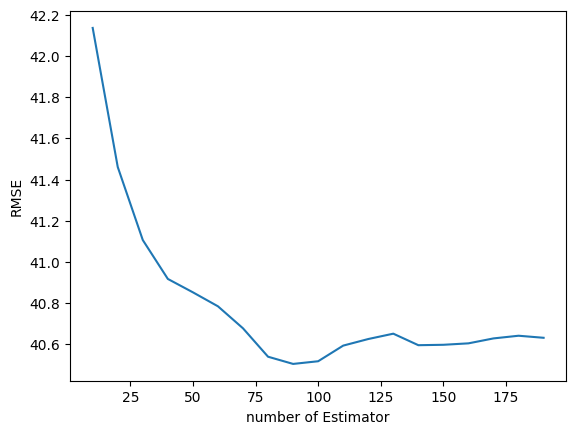

In [70]:
import matplotlib.pyplot as plt
plt.plot(df_scores.n_estimator, df_scores.rmse)
plt.xlabel('number of Estimator')
plt.ylabel('RMSE')
plt.show()

We see, optimal n_estimator is 80

In [72]:
scores = {'depth': [], 'rmse': []}
for depth in [10, 15, 20, 25]:
    rf = RandomForestRegressor(n_estimators=80, max_depth= depth, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred).round(3)
    scores['depth'].append(depth)
    scores['rmse'].append(rmse)

In [76]:
df_scores_depth = pd.DataFrame(scores)

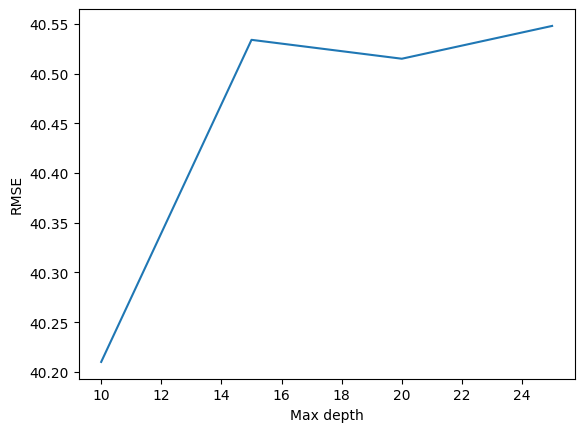

In [77]:
plt.plot(df_scores_depth.depth, df_scores_depth.rmse)
plt.xlabel('Max depth')
plt.ylabel('RMSE')
plt.show()

10  is best max depth